# gtipy - bitbucket.org/GRIDSMART/public-gtipy

https://bitbucket.org/GRIDSMART/public-gtipy

This notebook demonstrates how the code in the `public-gtipy` repo can be used to interact with the GRIDSMART Site API to download and analyze traffic data. You will need a direct IP connection to a GRIDSMART site, via your intranet, to use this notebook.

## Your Site

In [1]:
my_site_ip = '255.255.255.255'
my_site_port = 123456

## Imports

In [2]:
# some general imports
import os, pytz

# import the code from the `public-gtipy` repo, saved locally as ~/python/gtipy
from gtipy import *

## Connect using `SiteAPI`

In [3]:
# connect to a site using `SiteAPI` with IP address and port
my_site = SiteAPI(ip = my_site_ip, port = my_site_port)

# show some site info
my_site.name, my_site.id

('Kingston Pk & Northshore', '31c94966-4e68-4969-8951-2d1ac861d10a')

## Get list of available days of data

In [4]:
# get available days of data in a range
available_days = my_site.get_days_of_data_available(first_day='2016-10-03', last_day='2016-10-09')

# show the days returned (they are in descending order)
available_days

['2016-10-09',
 '2016-10-08',
 '2016-10-07',
 '2016-10-06',
 '2016-10-05',
 '2016-10-04',
 '2016-10-03']

## Download the data

Depending on your connection speed and the number of days you are downloading, this could take some time.

In [5]:
# download the available daily data zips, will be in `./<site_id>/zips`
for day in available_days:
    my_site.get_counts_by_date(day)

## Create daily CSVs

This bit of code will extract the zone count data, etc. from the zip files downloaded previously and create a single CSV file for each day that contains all the counts for that day, each line representing one such event. This can take some time if you have lots of data.

In [6]:
# create daily count per line csvs
site_path = os.path.join( os.path.abspath('.'), my_site.id )
zones = my_site.get_vehicle_zones()
site_timezone = pytz.timezone('US/Eastern')

total_counts_parsed = make_daily_count_per_line_csvs(
    site_path=site_path, zones=zones, site_timezone=site_timezone
)

print total_counts_parsed

285046


### 285,046 counts for the week of Oct 3-9 (Monday-Sunday)

## Create by-day and by-hour CSVs

The code below will take the count-by-line daily CSV and make two CSVs where the count events have been aggregated into by-day and by-hour CSVs. Again, with lots of data, this can take awhile.

In [7]:
daily_df, hourly_df = make_by_day_and_hour_csvs_for_site(
    my_site.id,
    input_path = os.path.join( os.path.abspath('.'), my_site.id, 'dailys'),
    output_path = os.path.join( os.path.abspath('.'), my_site.id)
)

### 7 Days, 168 Hours, 41 Data Columns

In [11]:
daily_df

timestamp  day_of_week  total  nb_left_car  nb_left_trk  nb_thru_car  \
0  20161003            0  44639         1798            6         6173   
1  20161004            1  44781         1777            5         6135   
2  20161005            2  44786         1849            8         5933   
3  20161006            3  44619         1880           11         5938   
4  20161007            4  45648         1759            8         5854   
5  20161008            5  32530         1125            1         3238   
6  20161009            6  28043         1093            2         2842   

   nb_thru_trk  nb_right_car  nb_right_trk  nb_uturn_car      ...        \
0           31          1511             2             2      ...         
1           48          1558             4             2      ...         
2           39          1574             3             4      ...         
3           38          1599             1             2      ...         
4           27          1657             3             0      ...         
5            6          1291             3             4      ...         
6            3           985             0             1      ...         

   wb_left_trk  wb_thru_car  wb_thru_trk  wb_right_car  wb_right_trk  \
0            5         7685           71          2532            57   
1            9         7626           90          2435            82   
2            8         7915          113          2615            52   
3            5         7378          151          2571           105   
4            4         7896          126          2625           133   
5            5         6532           79          2034            90   
6            1         5171           45          1767            53   

   wb_uturn_car  wb_uturn_trk  wb_perm_left  holiday  special_event  
0            10             0           600        0              0  
1            17             0           601        0              0  
2            14             0           562        0              0  
3            17             1           578        0              0  
4            16             1           567        0              0  
5             1             0           635        0              0  
6             2             0           448        0              0  

[7 rows x 41 columns]

In [13]:
hourly_df.head()

timestamp  day_of_week  total  nb_left_car  nb_left_trk  nb_thru_car  \
0  20161003T000000            0    158            3            0           25   
1  20161003T010000            0     84            1            0            9   
2  20161003T020000            0     55            1            0            4   
3  20161003T030000            0     63            0            0           13   
4  20161003T040000            0    131            3            0           21   

   nb_thru_trk  nb_right_car  nb_right_trk  nb_uturn_car      ...        \
0            0             7             0             0      ...         
1            0             6             0             0      ...         
2            0             2             0             0      ...         
3            0             5             0             0      ...         
4            0             7             0             0      ...         

   wb_left_trk  wb_thru_car  wb_thru_trk  wb_right_car  wb_right_trk  \
0            0           22            0             5             0   
1            0            9            0             2             0   
2            0            7            0             2             0   
3            0            6            1             2             0   
4            0            8            0             4             0   

   wb_uturn_car  wb_uturn_trk  wb_perm_left  holiday  special_event  
0             0             0             3        0              0  
1             0             0             1        0              0  
2             0             0             1        0              0  
3             0             0             0        0              0  
4             0             0             6        0              0  

[5 rows x 41 columns]

## Some plotting

In [39]:
# set up for plotting
%pylab inline
# mpl.style.use('ggplot')
# mpl.rcParams['axes.grid'] = True
# mpl.rcParams['figure.figsize']=(9.33, 7)
import seaborn as sns
sns.set_context('talk')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


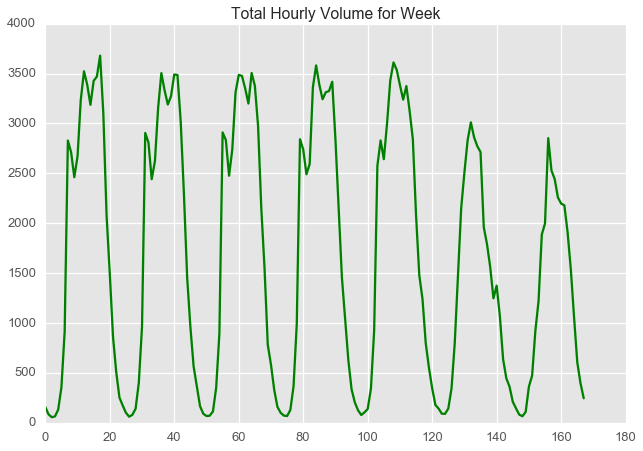

In [43]:
f = figure()
p = plot(hourly_df.total, 'g-')
t = gca().set_title('Total Hourly Volume for Week')

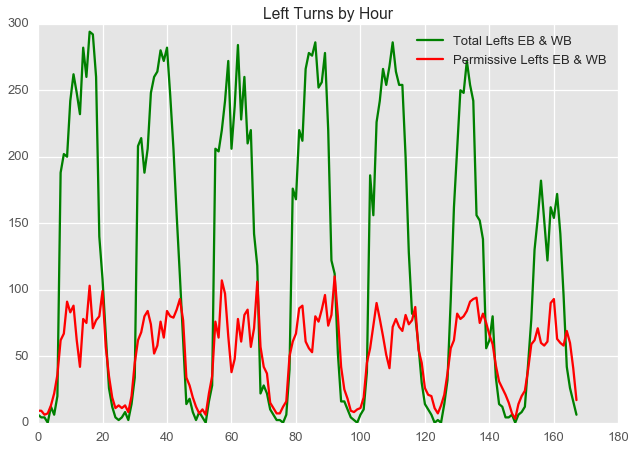

In [42]:
wb_left_total = hourly_df.wb_left_car + hourly_df.wb_left_trk
eb_left_total = hourly_df.eb_left_car + hourly_df.eb_left_trk
wb_left_perm = hourly_df.wb_perm_left
eb_left_perm = hourly_df.eb_perm_left

f = figure()
p = plot(wb_left_total + wb_left_total, 'g-', label='Total Lefts for Week (EB & WB)')
a = gca()
p = a.plot(wb_left_perm+eb_left_perm, 'r-', label='Permissive Lefts EB & WB')
l = legend()
t = a.set_title('Left Turns by Hour')